In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('Churn.csv')

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Only the above three columns are numeric. We need to convert rest of the columns to numeric type

In [5]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
print(data['TotalCharges'].dtype)
print(data['MonthlyCharges'].dtype)
print(data["PaymentMethod"].unique())
print(data["TotalCharges"].unique())

object
float64
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']


In [7]:
# data["TotalCharges"] = data["TotalCharges"].astype(float) 
data["TotalCharges"] = pd.to_numeric(data["TotalCharges"] , errors='coerce')
data["TotalCharges"].notnull().describe()

count     7043
unique       2
top       True
freq      7032
Name: TotalCharges, dtype: object

In [8]:
data['MultipleLines'] = data['MultipleLines'].replace({'No phone service':0, 'No':1, 'Yes':2})
data['InternetService'] = data['InternetService'].replace({'No':0, 'DSL':1, 'Fiber optic':2})
data['OnlineSecurity'] = data['OnlineSecurity'].replace({'No internet service':0, 'No':1, 'Yes':2})
data['OnlineBackup'] = data['OnlineBackup'].replace({'No internet service':0, 'No':1, 'Yes':2})
data['DeviceProtection'] = data['DeviceProtection'].replace({'No internet service':0, 'No':1, 'Yes':2})
data['TechSupport'] = data['TechSupport'].replace({'No internet service':0, 'No':1, 'Yes':2})
data['StreamingTV'] = data['StreamingTV'].replace({'No internet service':0, 'No':1, 'Yes':2})
data['StreamingMovies'] = data['StreamingMovies'].replace({'No internet service':0, 'No':1, 'Yes':2})
data['Contract'] = data['Contract'].replace({'Month-to-month':0, 'One year':1, 'Two year':2})
data['PaymentMethod'] = data['PaymentMethod'].replace({'Electronic check':1, 'Mailed check':2, 
                            'Bank transfer (automatic)':3, 'Credit card (automatic)':4})

data['gender'] = LabelEncoder().fit_transform(data['gender'])
data['Partner'] = LabelEncoder().fit_transform(data['Partner'])
data['Dependents'] = LabelEncoder().fit_transform(data['Dependents'])
data['PhoneService'] = LabelEncoder().fit_transform(data['PhoneService'])
data['PaperlessBilling'] = LabelEncoder().fit_transform(data['PaperlessBilling'])

data['Churn'] = data['Churn'].replace({'Yes':1, 'No':0})

In [9]:
data.head()
df = data.drop(['customerID'], axis=1)
df = df.dropna()

In [10]:
# cols = df.columns
# std = StandardScaler().fit_transform(df)
# df = pd.DataFrame(std, columns=cols)

------------

### Data Visualization
 Correlation

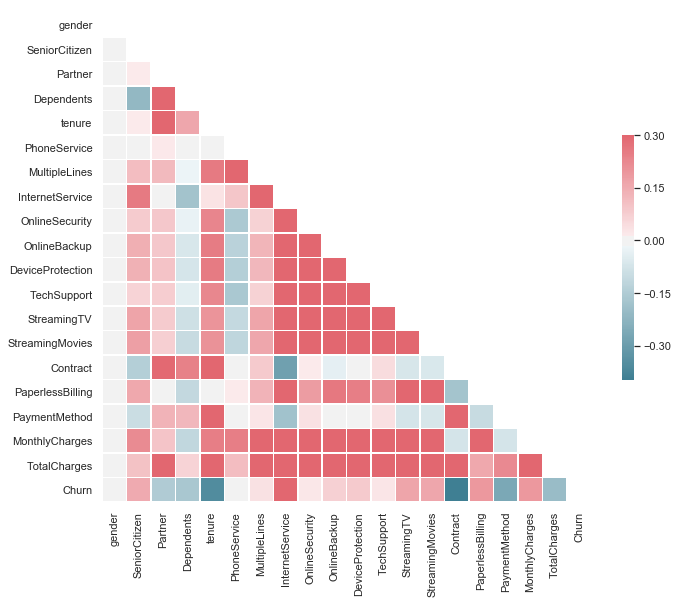

In [11]:
sns.set(style="white")

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))

f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

- Gender has no correlation with churn

In [17]:
df = df.drop(['gender'],axis=1)
df.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'],
      dtype='object')

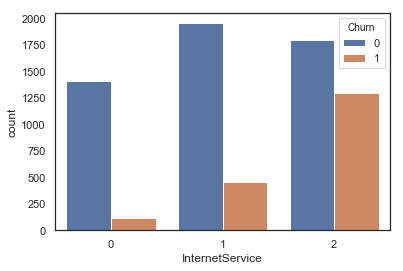

In [18]:
sns.countplot(x="InternetService", hue="Churn", data=df)
### 0:No; 1:DSL; 2:Fibre optics

People with Internet service(Fibre-optic) have a very high churn

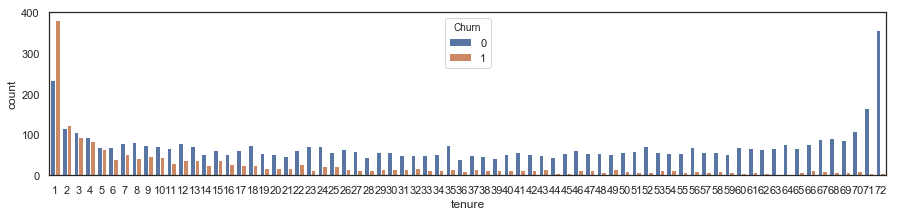

In [19]:
# sns.boxplot(x = 'Churn', y = 'tenure', data =df)
plt.subplots(figsize=(15,3))
sns.countplot(x = 'tenure', hue = 'Churn', data =df)

Customers with higher tenure are less likely to churn

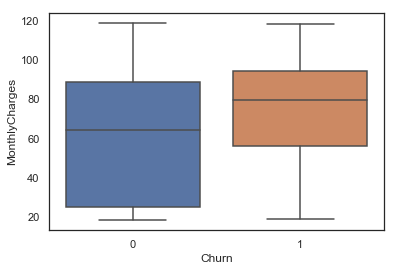

In [20]:
sns.boxplot(x = 'Churn', y = 'MonthlyCharges', data =df)

Customers who churn are more likely to have higher monthly charges

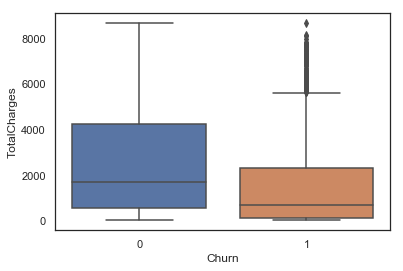

In [21]:
sns.boxplot(x = 'Churn', y = 'TotalCharges', data =df)
# sns.countplot(x = 'TotakCharges', hue = 'Churn', data =df)

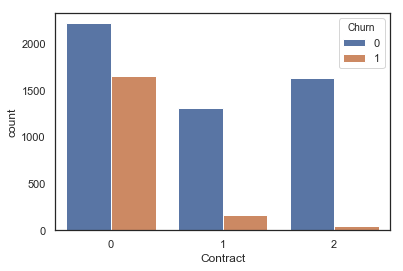

In [59]:
sns.countplot(x = 'Contract', hue = 'Churn', data =df)

Month-to-month=0 &emsp; One year=1 &emsp;Two year=2

---------------------------------------

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [24]:
y = df['Churn']
x = df.drop(['Churn'],axis=1)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [38]:
### logistic regression
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression(solver='liblinear',penalty='l1')
lr_clf.fit(X_train, y_train)
lr = lr_clf.predict(X_test)
lr_pred_prob = lr_clf.predict_proba(X_test)[:,1]

lr_clf.score(X_test,y_test)

0.8017057569296375

In [52]:
### SVM
from sklearn.svm import SVC
svc = SVC(gamma='auto')
svc.fit(X_train,y_train)
sv = svc.predict(X_test)

svc.score(X_test,y_test)

0.7647476901208244

In [33]:
### Decision tree
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
dt = dt_clf.predict(X_test)
dt_pred_prob = dt_clf.predict_proba(X_test)[:,1]

dt_clf.score(X_test,y_test)

0.7263681592039801

In [37]:
### Random forest
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier( n_estimators= 50)
rf_clf.fit(X_train, y_train)
rf = rf_clf.predict(X_test)
rf_pred_prob = rf_clf.predict_proba(X_test)[:,1]

rf_clf.score(X_test, y_test)

0.7853589196872779

In [34]:
### XGboost
import xgboost as xgb
xg_clf = xgb.XGBClassifier()
xg_clf.fit(X_train, y_train)
xg = xg_clf.predict(X_test)
xg_pred_prob = xg_clf.predict_proba(X_test)[:,1]

xg_clf.score(X_test,y_test)

0.7796730632551528

In [31]:
df['Churn'].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

Imbalanced dataset, accuracy not a very good measure

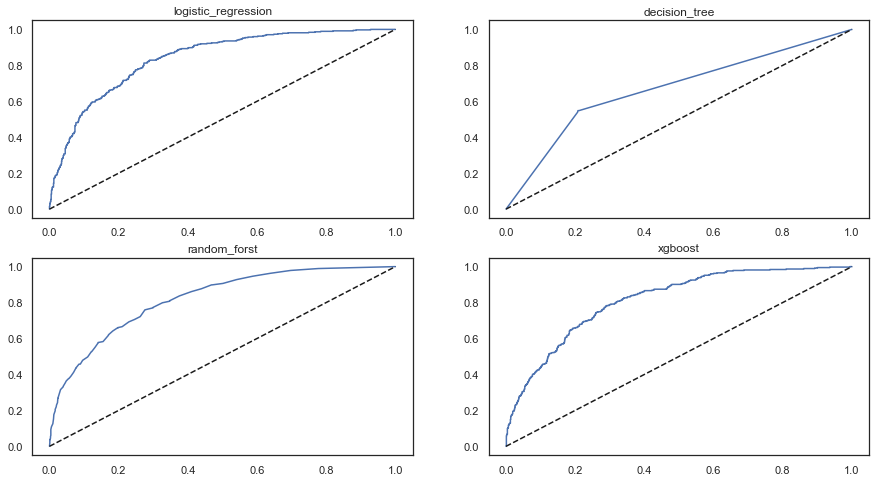

In [49]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr_lr, tpr_lr, threshold = roc_curve(y_test, lr_pred_prob)
fpr_dt, tpr_dt, threshold = roc_curve(y_test, dt_pred_prob)
fpr_rf, tpr_rf, threshold = roc_curve(y_test, rf_pred_prob)
fpr_xg, tpr_xg, threshold = roc_curve(y_test, xg_pred_prob)

fig,a =  plt.subplots(2,2,figsize=(15,8))

a[0][0].plot(fpr_lr,tpr_lr)
a[0][0].set_title('logistic_regression')
a[0][0].plot([0,1],[0,1], "k--")

a[0][1].plot(fpr_dt,tpr_dt)
a[0][1].set_title('decision_tree')
a[0][1].plot([0,1],[0,1], "k--")

a[1][0].plot(fpr_rf,tpr_rf)
a[1][0].set_title('random_forst')
a[1][0].plot([0,1],[0,1], "k--")

a[1][1].plot(fpr_xg,tpr_xg)
a[1][1].set_title('xgboost')
a[1][1].plot([0,1],[0,1], "k--")

plt.show()

In [50]:
print("AUC: \n")
lr1 = confusion_matrix(y_test,lr)
print("lr: ",roc_auc_score(y_test,lr))

sv1 = confusion_matrix(y_test, sv)
print("svm: ",roc_auc_score(y_test,sv))

dt1 = confusion_matrix(y_test, dt)
print("dt: ",roc_auc_score(y_test,dt))

rf1 = confusion_matrix(y_test, rf)
print("rf: ",roc_auc_score(y_test,rf))

xg1 = confusion_matrix(y_test, xg)
print("xgb: ",roc_auc_score(y_test,xg))

print("Confusion Matrix \n")
print("logistic regression \n", lr1)
print("\n\n SVM \n", sv1)
print("\n\n decision tree \n", dt1)
print("\n\n random forest \n", rf1)
print("\n\n xgboost \n", xg1)

AUC: 

lr:  0.7259384172572487
svm:  0.5907486113339994
dt:  0.6678085737507182
rf:  0.6934840115752364
xgb:  0.6947290224723173
Confusion Matrix 

logistic regression 
 [[917 116]
 [163 211]]


 SVM 
 [[994  39]
 [292  82]]


 decision tree 
 [[819 214]
 [171 203]]


 random forest 
 [[919 114]
 [188 186]]


 xgboost 
 [[905 128]
 [182 192]]


### Hyper-parameter tuning

In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import log_loss

#### Support Vector Machine

In [64]:
### SVM
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
grid = GridSearchCV(SVC(), param_grid, refit = True, cv=5, verbose = 3)  
# grid.fit(X_train, y_train) 
# print(grid.best_params_) 
# print(grid.best_estimator_)
# grid_predictions = grid.predict(X_test) 

best_params: {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}

In [66]:
svc = SVC(C=10, gamma=0.0001, kernel='rbf')
svc.fit(X_train,y_train)
svm_pred = svc.predict(X_test)

print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1033
           1       0.66      0.43      0.52       374

   micro avg       0.79      0.79      0.79      1407
   macro avg       0.74      0.68      0.69      1407
weighted avg       0.78      0.79      0.77      1407



---------------------

### Random forest

In [54]:
param_grid ={'n_estimators':[37],
             "max_depth": [3],
             "bootstrap": [True, False],
             "criterion": ["gini", "entropy"]}
clf_cv = RandomizedSearchCV(RandomForestClassifier(), param_grid, n_iter=100, cv=5, verbose=1)
# clf_cv.fit(X_train, y_train)
# print(clf_cv.best_params_)
# print(clf_cv.best_score_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
{'n_estimators': 37, 'max_depth': 3, 'criterion': 'gini', 'bootstrap': True}
<br/> best_score: 0.7904

In [55]:
rf = RandomForestClassifier(n_estimators=37,max_depth=3,criterion='gini',bootstrap=True)
rf.fit(X_train, y_train)
rf.feature_importances_

array([4.20710541e-04, 3.31479102e-03, 8.46927309e-05, 1.69522096e-01,
       0.00000000e+00, 3.61205360e-04, 1.51759430e-01, 6.39519011e-02,
       3.31991745e-02, 6.65259005e-03, 3.67278984e-02, 1.32992149e-02,
       3.27021746e-02, 3.27698487e-01, 3.42820395e-03, 4.61163614e-02,
       2.91060587e-02, 8.16550104e-02])

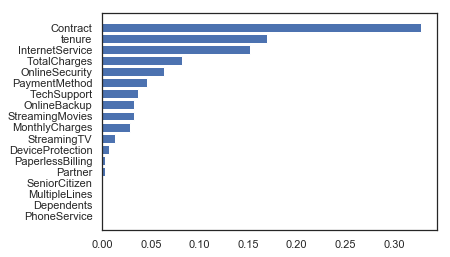

In [56]:
### feature importances
importances = rf.feature_importances_
sorted_index = np.argsort(importances)

labels = X_train.columns[sorted_index]
plt.clf()
plt.barh(range(X_train.shape[1]), importances[sorted_index], tick_label=labels)
plt.show()

Contract ,Tenure and Internet service are the most important features

In [60]:
rf_pred = rf.predict(X_test)
print(rf.score(X_test, y_test))
print(confusion_matrix(y_test, rf_pred))
pred_probs = rf.predict_proba(X_test)
logloss_score = log_loss(y_test, pred_probs)
print(logloss_score)

0.7938877043354655
[[961  72]
 [218 156]]
0.4349944394073501


-----------------------

Some measures to devrease churn rate:
- Customers should be encourage to take a longer contract, by giving better offers, etc.
- For the first 3/4 months customer should be given surprize gifts/offers to make sure they stay for atleast 5/6 months, because after that the churn rate is low. 
- Churn higly depends on Internet connection, and people with Fibre-Optic tend to leave, so the company should look into that as well.